# CES


## Statistiques régression linéaire avec Python

Auteurs : Joseph Salmon, Alexandre Gramfort

Ce notebook contient des éléments d'introduction au langage Python avec Numpy qui est un outil de base pour le machine learning en Python. Nous allons illustrer tous les concepts sur des images.

Ressources externes: introductions générales (Python, Scipy, Numpy, Matplotlib, Pandas etc.)

* [http://scipy-lectures.github.io](http://scipy-lectures.github.io)

* [http://perso.telecom-paristech.fr/~gramfort/cours_python/1-Intro-Python.html](http://perso.telecom-paristech.fr/~gramfort/cours_python/1-Intro-Python.html)

* [http://perso.telecom-paristech.fr/~gramfort/cours_python/2-Numpy.html](http://perso.telecom-paristech.fr/~gramfort/cours_python/2-Numpy.html)

* [http://perso.telecom-paristech.fr/~gramfort/cours_python/3-Scipy.html](http://perso.telecom-paristech.fr/~gramfort/cours_python/3-Scipy.html)

* [http://jrjohansson.github.io/](http://jrjohansson.github.io/)

* [http://www.loria.fr/~rougier/teaching/matplotlib/matplotlib.html](http://www.loria.fr/~rougier/teaching/matplotlib/matplotlib.html) : introduction à Matplotlib

* [https://www.youtube.com/watch?v=TSsSWuhBpmY](https://www.youtube.com/watch?v=TSsSWuhBpmY) : tutoriel en anglais sur Pandas

Ressources externes diverses:

* [http://freakonometrics.hypotheses.org/category/statistics](http://freakonometrics.hypotheses.org/category/statistics): Blog sur la statistique / science des données

* [http://perso.univ-rennes1.fr/bernard.delyon/regression.pdf](http://perso.univ-rennes1.fr/bernard.delyon/regression.pdf): cours théorique sur la régression lineaire

* [http://bokeh.pydata.org/en/latest/docs/gallery/color_scatter.html](http://bokeh.pydata.org/en/latest/docs/gallery/color_scatter.html): affichage graphique interactif

## Imports et intialisation

In [86]:
import numpy as np
import pandas as pd  # charge un package pour le traitement des données
import matplotlib.pyplot as plt

## Chargement manipulation des données:

On utilisera IPython Notebook pour faire ce TP.

REM: pour les salles machines de Telecom Paristech, charger la version Anconda disponible dans le menu application/developpement. 

Le mot "régression" a été introduit par Sir Francis Galton (cousin de C. Darwin) alors qu'il étudiait la taille des individus au sein d'une descendance. Il tentait de comprendre pourquoi les grands individus d'une population semblait avoir des enfants d'une taille plus petite, plus proche de la taille moyenne de la population; d’où l'introduction du terme "régression". Dans la suite on va s’intéresser aux données historiques récoltées par Galton.


**Questions**: que signifie '\t' dans la commde suivante?

In [87]:
url = 'http://www.math.uah.edu/stat/data/Galton.txt'
data = pd.read_csv(url, sep='\t')
data.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


'\t' signifie qu'on charge identifie chaque valeur du tableau comme étant celles séparées (sep) par une tabulation ('\t')

**Questions**: Que fait la ligne de commande suivante? 

In [88]:
data['MeanParents'] = 0.5 * (data['Father'] + 1.08 * data['Mother'])

Cette ligne créé une nouvelle colonne 'MeanParents'. Elle est remplit comme une regression des colonnes 'Father' et 'Mother'

Pour information la taille du parent "moyen" selon Galton vaut: $\frac12\left(\mathrm{taille}(\mathrm{pere}) + 1.08 \times \mathrm{taille}(\mathrm{mere})\right)$

**Questions**: Comparer les deux commandes qui suivent

In [89]:
X0 = data[['MeanParents']]
X0prime = data['MeanParents']


In [90]:
print X0.shape # c'est un vecteur colonne
print X0prime.shape # c'est un vecteur (ni vecteur ligne, ni vecteur colonne : d'où l'absence de seconde dimension)

(898, 1)
(898,)


## Régression en dimension 1:
On note $x_i$ la taille du parent moyen pour la famille $i$ et $y_i$ la taille de l'enfant. On écrit $y_i = \theta_1 x_i + \theta_0 + \varepsilon_i$ et on modlise les variables $\varepsilon_i$ comme centrées, indépendantes de même variance $\sigma^2$ inconnue.

**Questions**: Tracer le nuage de points $(x_i, y_i)$ pour $1\leq i\leq n$, où $n$ est le nombre d'observations figurant dans les données.

In [91]:
%matplotlib inline

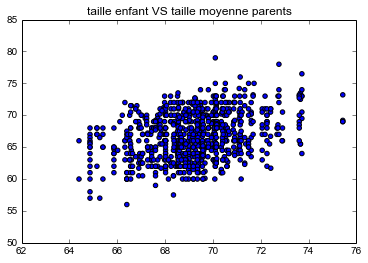

(0.0, 1.0, 0.0, 1.0)

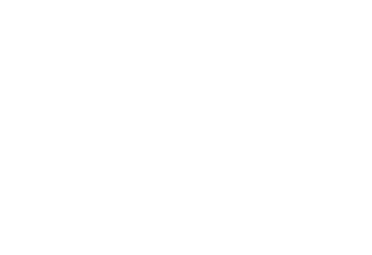

In [92]:
import matplotlib.pyplot as plt

X = np.asarray(data)
X = np.transpose(X)[1:,:]
x = X[5,:][:,np.newaxis]# on récupère le vecteur des tailles moyennes des parents
y = X[3,:] # on récupère le vecteur des tailles des enfants


plt.title('taille enfant VS taille moyenne parents')
plt.scatter(x,y)
plt.show()
plt.axis('off')

**Question**: Estimer $\theta_0$, $\theta_1$, par $\hat{\theta}_0$, $\hat{\theta}_1$ en utilisant la fonction **LinearRegression** de **sklearn**.

In [93]:
from sklearn import linear_model
skl_linmod = linear_model.LinearRegression()
#print x.shape
#print y.shape
skl_linmod.fit(x,y)
print "estimation de theta1 = ",skl_linmod.coef_[0]
print "estimation de theta0 = ",skl_linmod.intercept_

estimation de theta1 =  0.641190379591
estimation de theta0 =  22.376205683


**Question**: Calculer et visualiser les valeurs prédites $\hat y_i = \hat\theta_1 x_i
+\hat\theta_0$ et $y_i$ sur un même graphique.

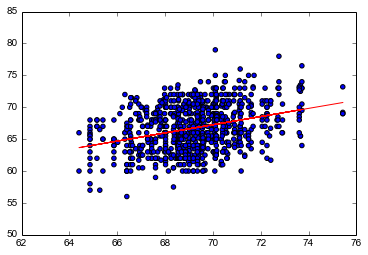

(0.0, 1.0, 0.0, 1.0)

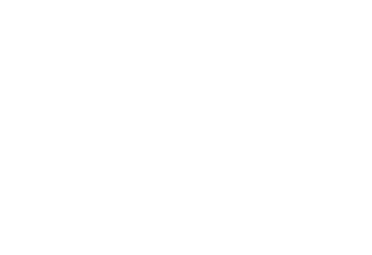

In [94]:
fig=plt.figure()
ypredict = skl_linmod.predict(x)
plt.scatter(x,y)
plt.plot(x,ypredict,c='r')
plt.show()
plt.axis('off')

**Question**: Visualiser l'histogramme des résidus $r_i = y_i -\hat y_i$. L'hypothèse de normalité est-elle crédible? 

Bonus: Afficher aussi un estimateur de la densite de type "estimateur à noyau" avec un noyau gaussien (cf. [https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/) pour plus d'informations)

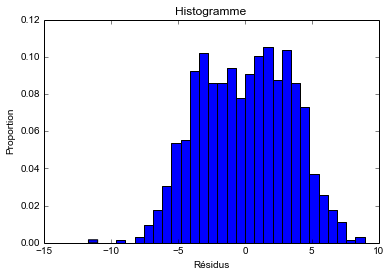

(0.0, 1.0, 0.0, 1.0)

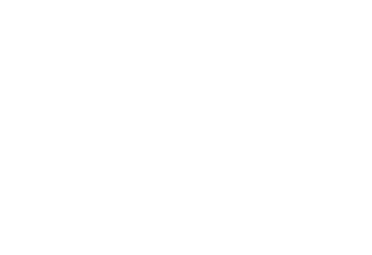

In [95]:
#### plt.figure()
residual = skl_linmod.predict(X0) - y
plt.hist(residual, bins=30, normed=True, align='mid')
plt.title('Histogramme')
plt.xlabel(u'Résidus') # noter la l'utilisaiton du u 'Résidus'
plt.ylabel('Proportion')
plt.show()
plt.axis('off')

Non, l'hyposthèse d'erreur normale n'est pas validée, car la distribution des residus (erreurs empiriques) bien que centrée, ne forme pas une cloche. L'hypothèse d'un mélange de deux gaussiennes seraient plus adéquate...

In [96]:
from sklearn.neighbors import KernelDensity
def kde_sklearn(x, x_grid, bandwidth=0.2):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

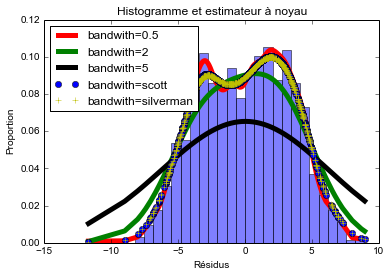

In [97]:
from scipy import stats

x_test= np.sort(residual)
kernel_scott = stats.gaussian_kde(np.asarray(x_test).astype(np.float),bw_method='scott')
kernel_silverman = stats.gaussian_kde(np.asarray(x_test).astype(np.float),bw_method='silverman')


fig=plt.figure()
plt.hist(residual, bins=30, normed=True, align='mid',alpha=0.5)
plt.plot(x_test, kde_sklearn(x_test, x_test, bandwidth=0.5),
         '-r',linewidth=5,label='bandwith=0.5')
plt.plot(x_test, kde_sklearn(x_test, x_test, bandwidth=2),
         '-g',linewidth=5,label='bandwith=2')
plt.plot(x_test, kde_sklearn(x_test, x_test, bandwidth=5),
         '-k',linewidth=5,label='bandwith=5')
plt.plot(x_test, kernel_scott(np.asarray(x_test).astype(np.float)),
        'ob',label='bandwith=scott')
plt.plot(x_test, kernel_silverman(np.asarray(x_test).astype(np.float)),
        '+y',label='bandwith=silverman')
plt.legend(loc=2)
plt.title(u'Histogramme et estimateur à noyau')
plt.xlabel(u'Résidus') # noter la l'utilisaiton du u 'Résidus'
plt.ylabel('Proportion')

Les bandwidth optimales de Scott et de Silverman donnent le même résultat, à savoir un mélange de deux gaussiennes. 

## Régression en dimension 2:

On travaille ici avec la même base de données, mais cette fois on considère un modèle de régression avec les deux variables explicatives “**Father**” et “**Mother**”.

On rappelle les notations suivantes:

* $\hat{\theta} \in argmin_{\theta \in \mathbb{R}^p} \|y -X\theta\|^2/2$ est l'estimateur par moindres carrés de $\theta$  (pour rappel $\hat{\theta} = (X^\top X)^{-1}X^\top y$ quand la matrice $X^\top X$ est inversible).

* $\hat y = X \hat\theta$, la prédiction sur les valeurs observées

* Le vecteur $r=y-\hat y$ est appelé vecteur des résidus.
$1_n=(1,\dots,1)^\top $ est le vecteur rempli de un, et de taille $n\times 1$


**Question**: Calculer $\hat\theta$, $\hat y$ pour ce modèle avec **sklearn**

In [98]:
X1 = data[['Father', 'Mother']]
skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(X1, y)

results = skl_linmod.coef_
print results
print skl_linmod.intercept_

[ 0.4  0.3]
22.3097054896


**Question**: comment fonctionne la fonction meshgrid ci-dessous? Afficher les points et leur prédictions sur un même graphique 3D.

La fonction meshgrid quadrille le plan en vue d'un plot 3D (surf, mesh, scatter3, plot3...)

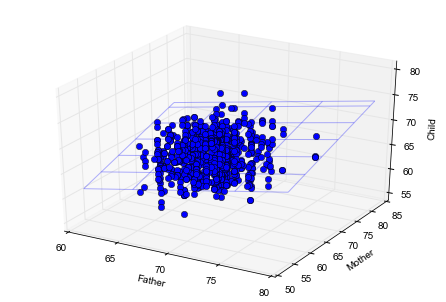

In [99]:
# Meshgrid creation:
XX = np.arange(np.min(X1['Father']) - 2, np.max(X1['Father']) + 2, 0.5)
YY = np.arange(np.min(X1['Mother']) - 2, np.max(X1['Mother']) + 2, 0.5)
YY = np.arange(np.min(y) - 2, np.max(y) + 2, 0.5)
xx, yy = np.meshgrid(XX, YY)
zz = results[0] * xx + results[1] * yy + skl_linmod.intercept_

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X1['Father'], X1['Mother'], y, 'o')
ax.set_zlim(np.min(y) - 2, np.max(y) + 2)
ax.set_xlabel('Father')
ax.set_ylabel('Mother')
ax.set_zlabel('Child')
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10, alpha=0.3)

**Question**: Calculer le carré de la norme du vecteur des résidus: $ \|r\|^2$. Visualiser l'histogramme des résidus, et aussi un estimateur à noyau de leur densité.

In [100]:
print "erreur moindres carrés : ",np.linalg.norm(y-skl_linmod.predict(X1))**2

erreur moindres carrés :  10261.1274012


**Question**: Comparer l'influence des deux variables. Laquelle semble la plus explicative? Tester avant et après centrage et réduction des données. Utiliser pour cela **StandardScaler** de **preprocessing**. 

In [101]:
print "estimation_theta_father : ",skl_linmod.coef_[0]
print "estimation_theta_mother : ",skl_linmod.coef_[1]
print "ratio : ",skl_linmod.coef_[0]/skl_linmod.coef_[1]


estimation_theta_father :  0.379896965324
estimation_theta_mother :  0.283214514708
ratio :  1.34137533776


l'estimateur du regresseur du pere est plus grand que celui de la mère, donc le père influe plus que la mère sur la taille des enfants (1.34 fois plus)

In [102]:
from sklearn.preprocessing import scale
X1reduced = scale(X1)
skl_linmod_reduced = linear_model.LinearRegression()
skl_linmod_reduced.fit(X1reduced, y)
print "estimation_theta_father (après centrage et reduction) : ",skl_linmod_reduced.coef_[0]
print "estimation_theta_mother (après centrage et reduction) : ",skl_linmod_reduced.coef_[1]
print "ratio : ",skl_linmod_reduced.coef_[0]/skl_linmod_reduced.coef_[1]

estimation_theta_father (après centrage et reduction) :  0.937920022315
estimation_theta_mother (après centrage et reduction) :  0.653019128034
ratio :  1.43628261723


Après centrage et réduction, l'estimateur du regresseur du pere est toujours plus grand que celui de la mère. Donc si le père influe plus sur la taille de son enfant, ce n'est pas parce que le père est plus grand que la mère (en effet, avec le centrage-réduction, on rapporte le père et le mère à la même échelle)

## Régression en dimension 2: dataset auto-mpg 

On travaille maintenant sur le fichier '**auto-mpg.data**' et on cherche à régresser la consommation des voitures sur leurs caractéristiques: nombre de cylindres, cylindrés (*engine displacement* en anglais), puissance, poids, accélération, année, pays d'origine et le nom de la voiture.

On utilise un modèle linéaire,
où $y$ est le vecteur contenant les consommations des voitures (plus précisément la distance parcourue en *miles par gallon*, ou *mpg*);
les colonnes de $X$ sont les variables restantes. 

**Question**: Importer avec Pandas la base de données disponible ici https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data. On peut ajouter (manuellement) le noms des colonnes en consultant l’adresse : https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names avec l’attribut 'name' de import_csv. On pourra si besoin considérer l'option sep=r"\s\+".


In [103]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
u_cols = ['mpg','cylinders', 'displacement', 'horsepower',
          'weight', 'acceleration', 'model year', 'origin', 'car name']
data = pd.read_csv(url, names=u_cols, sep='\s\s+|\t', na_values='?')
print data.shape
data.head(10)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,8,307,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15,8,350,165,3693,11.5,70,1,"""buick skylark 320"""
2,18,8,318,150,3436,11.0,70,1,"""plymouth satellite"""
3,16,8,304,150,3433,12.0,70,1,"""amc rebel sst"""
4,17,8,302,140,3449,10.5,70,1,"""ford torino"""
5,15,8,429,198,4341,10.0,70,1,"""ford galaxie 500"""
6,14,8,454,220,4354,9.0,70,1,"""chevrolet impala"""
7,14,8,440,215,4312,8.5,70,1,"""plymouth fury iii"""
8,14,8,455,225,4425,10.0,70,1,"""pontiac catalina"""
9,15,8,390,190,3850,8.5,70,1,"""amc ambassador dpl"""


**Question**: Quelle est le marqueur utilisé pour les données manquantes dans le fichier csv utilisé ? Changer cet élément en un NaN, avec l’option na_values de **read_csv**. Enlever les lignes
possédant des valeurs manquantes dans la base de données.

le marqueur des données manquantes est la point d'interrogation ('?')

**Question**: Tester s'il y a des NaN dans le dataframe. Quelles sont les lignes qui en ont? pour quelle(s) variable(s)? Enlever ces lignes. 

In [104]:
data_nan=data.isnull().any()
print data_nan

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool


les variables pour lesquelles on a True sont les variables à qui ils manquent des infos pour certains vehicules

In [105]:
print np.where(data['horsepower'].isnull())[0]
# opposite
# np.where(data['horsepower'].notnull())[0]

[ 32 126 330 336 354 374]


il s'agit des lignes (véhicules) contenant l'information de puissance 'horsepower' manquante

In [106]:
data = data.dropna(axis=0, how='any')
print data.shape

(392, 9)


nouvelle forme de la matrice des variables explicatives

**Question**: Calculer $\hat\theta$ et $\hat y$ sur une sous partie de la base: garder les $9$ premières lignes et exclure la variable 
'**car name**' de l'étude. Que constatez-vous?

In [107]:
y = data['mpg']
X = data.drop(['car name', 'mpg'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

skl_linmod = linear_model.LinearRegression()
skl_linmod.fit(X[:9], y[:9])
np.set_printoptions(precision=5)
print "estimation_theta : ", skl_linmod.coef_

estimation_theta :  [ 0.       5.65281 -3.63395 -3.5975  -0.54932  0.       0.     ]


=> la cylindrée, l'origine et l'année n'ont aucune influence sur la consommation du véhicule, en effet : ces variables sont constantes pour ces 9 véhicules. Ces variables étant discrètes (qualitatives), on doit s'attendre à les voir constante sur plusieurs groupes de véhicules.

In [108]:
np.set_printoptions(precision=2)
print "estimation_theta0 : ",skl_linmod.intercept_
print "estimation_y : ",skl_linmod.predict(X[:9])
print "y            : ",y[:9].ravel()
print "linear model score (9 premiers elements) : ",skl_linmod.score(X[:9],y[:9])

estimation_theta0 :  15.6860116527
estimation_y :  [ 17.84  16.15  17.03  16.08  17.15  14.86  14.27  14.27  13.35]
y            :  [ 18.  15.  18.  16.  17.  15.  14.  14.  14.]
linear model score (9 premiers elements) :  0.867674331007


=> Le modèle représente assez bien les données avec un coefficient de correlation de 0.867

In [109]:
print "valeurs propres de la matrice des variables : ",skl_linmod.singular_
print "rang de la matrice des variables X[:9] : ",skl_linmod.rank_

valeurs propres de la matrice des variables :  [  3.81e+00   6.80e-01   3.88e-01   9.83e-02   6.66e-16   0.00e+00
   0.00e+00]
rang de la matrice des variables X[:9] :  4


=> on a une matrice de rang 4, et non min(7,9)=7 car on a 3 variables constantes et donc 3 colonnes liées (soit rang=7-3=4)

=> on a une valeur propre très grande par rapport aux autres, et donc une variable qui varie beaucoup plus que les autres et sur laquelle on pourrait projeter les données (PCA) et se retrouver avec une regression à un regresseur (seule la variable qui avait la plus grande valeur propre va expliquer la consommation du véhicule)

**Question**: Calculer l'estimateur des moindres carrés $\hat\theta$ et le vecteur de prediction $\hat y$ cette fois sur l'intégralité des données. Calculer le carré de la norme du vecteur des résidus $ \|r\|^2$,
 puis $\|r\|^2/n$. Vérifier numériquement que:
 
  $$\| y - \bar{y}_n 1_n\|^2=\| y - \hat{y}\|^2 +\| \hat{y} - \bar{y}_n 1_n\|^2$$
  
 avec $\bar{y}_n$ répresentant la moyenne des $y_i$.
  
  

In [110]:
#scaler = StandardScaler().fit(X)
#X = scaler.transform(X) # le centrage-reduction est fait à la cellule In [181]

skl_linmod_all = linear_model.LinearRegression()
skl_linmod_all.fit(X, y)
print "estimation_theta (toutes les données) : ", skl_linmod_all.coef_

estimation_theta (toutes les données) :  [-0.84  2.08 -0.65 -5.49  0.22  2.76  1.15]


=> Cette fois-ci, toutes les variables ont une influence sur la consommation du véhicule

In [111]:
np.set_printoptions(precision=1)
print "estimation_theta0 (toutes les données) : ",skl_linmod_all.intercept_
print "estimation_y : ",skl_linmod_all.predict(X[:15])
print "y            : ",y[:15].ravel()
print "linear model score : ", skl_linmod_all.score(X,y)

estimation_theta0 (toutes les données) :  23.4459183673
estimation_y :  [ 15.   14.   15.2  15.1  15.   10.7  10.7  10.7  10.2  13.1  15.3  14.1
  14.6  18.9  24.1]
y            :  [ 18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.  24.]
linear model score :  0.821478076481


In [112]:
yhat = skl_linmod_all.predict(X)
np.linalg.norm(y-np.mean(y))**2 - np.linalg.norm(y-yhat)**2 - np.linalg.norm(yhat-np.mean(y))**2

-1.0913936421275139e-11

=> la différence vaut ~0. L'erreur totale est en partie expliquée par le modèle, l'autre partie provient des residus.

**Question**: Supposons que l'on vous fournisse les caractéristiques suivantes d'un nouveau véhicule :

cylinders=6; displacement=225; horsepower =100; weight=32334; acceleration=15.4; year=76; origin=1    

Prédire alors sa consommation.

In [113]:
Xtest = scaler.transform(np.asarray([6,225,100,32334,15.4,76,1]))
#Xtest = scaler.transform(np.asarray([8,390,190,3850,8.5,70,1]))
ytest = skl_linmod_all.predict(Xtest[np.newaxis,:])
print ytest

[-167.]


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


=> on obtient une consommation negatif! Ce qui montre que le modèle ne se généralise pas bien à des données nouvelles

**Question**: Utiliser la transformation **PolynomialFeatures** de **sklearn** sur les données, pour ajuster un modèle d'ordre 2. On pourra tester cela avec ou sans les termes d'interactions avec l'option **interaction_only=True/False**

In [114]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X)
skl_polymod_all = linear_model.LinearRegression()
skl_polymod_all.fit(X2,y)
print "polynomial model score (interaction_only=False) : ", skl_polymod_all.score(X2,y)

polyi = PolynomialFeatures(2,interaction_only=True)
X2i = polyi.fit_transform(X)
skl_polyimod_all = linear_model.LinearRegression()
skl_polyimod_all.fit(X2i,y)
print "polynomial model score (interaction_only=True) : ", skl_polyimod_all.score(X2i,y)

polynomial model score (interaction_only=False) :  0.895314520494
polynomial model score (interaction_only=True) :  0.889349948832


=> modèle polynomial meilleur (R~0.89) que le modèle lineaire (R=0.82)

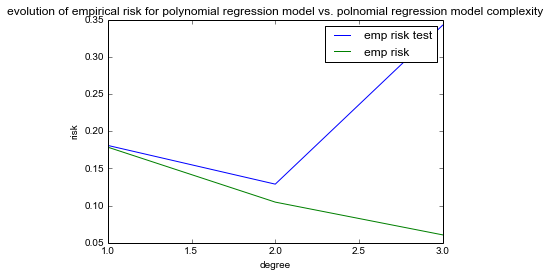

In [119]:
from sklearn import cross_validation

Nd=3
list_degres = range(1,Nd+1,1)
emp_risk = np.zeros(Nd)
emp_risk_test = np.zeros(Nd)
interact = False
for i,d in enumerate(list_degres):
    poly = PolynomialFeatures(d,interaction_only=interact)
    Xd = poly.fit_transform(X)
    # empirical risk
    skl_polymod_all_d = linear_model.LinearRegression()
    skl_polymod_all_d.fit(Xd,y)
    emp_risk[i] = 1-skl_polymod_all_d.score(Xd,y)
    # empirical risk on test data
    Xd_train,Xd_test,yd_train,yd_test = cross_validation.train_test_split(Xd,y,test_size=0.3,random_state=0)
    skl_polymod_all_d = linear_model.LinearRegression()
    skl_polymod_all_d.fit(Xd_train,yd_train)
    emp_risk_test[i] = 1-skl_polymod_all_d.score(Xd_test,yd_test)

fig = plt.figure()
plt.plot(list_degres,emp_risk_test,label='emp risk test')
plt.plot(list_degres,emp_risk,label='emp risk')
plt.xlabel('degree')
plt.ylabel('risk')
plt.legend()
plt.title('evolution of empirical risk for polynomial regression model vs. polnomial regression model complexity ')
plt.show()

    

On voit que le risque empirique diminue avec la complexité, car il s'agit de l'erreur d'ajustement aux données (biais) seulement (plus un modele est complexe, et plus il a de chance de s'ajuster aux données). Le risque empirique de test tient compte lui, de l'erreur d'estimation à posteriori (variance), il diminue puis se dégrade avec la complexité.
On obtient un compromis biais-variance pour **une complexité de degré 2**.

**Question Bonus** : Proposer une manière 
gérer les variables qualitatives dans le cas, potentiellement avec **sklearn.preprocessing.OneHotEncoder**.

In [116]:
from sklearn.preprocessing import OneHotEncoder
y = data['mpg']
X = data.drop(['car name', 'mpg'], axis=1)
encoder = OneHotEncoder()
encoder.fit(X)  
Xenc = encoder.transform(X)
skl_linmod_enc_all = linear_model.LinearRegression()
skl_linmod_enc_all.fit(Xenc,y)
print "number of features : ",Xenc.shape[1]
print "linear model score (with oneToHot encoder) : ",skl_linmod_enc_all.score(Xenc,y)


number of features :  557
linear model score (with oneToHot encoder) :  0.999244300561


=> on obtient un coefficient de correlation très proche de 1 (R=0.999), bien meilleur que sans encodage. Mais attention, car on vient de rajouter un très grand nombre de features(on est passé de 7 à 557), donc le modèle est plus complexe (d'où le risque faible 1-R) ce qui va malheureusement augmenter la variance du classifieur en contre-partie.

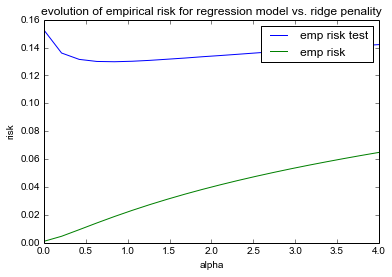

best penality alpha value :  0.842105263158


In [138]:
from sklearn.linear_model import Ridge

list_alphas = np.linspace(0,4,20)
emp_risk = np.zeros(list_alphas.size)
emp_risk_test = np.zeros(list_alphas.size)
Xa_train,Xa_test,ya_train,ya_test = cross_validation.train_test_split(Xenc,y,test_size=0.2,random_state=0)
for i,a in enumerate(list_alphas):
    # empirical risk
    skl_ridge = Ridge(alpha=a)
    skl_ridge.fit(Xenc,y)
    emp_risk[i] = 1-skl_ridge.score(Xenc,y)
    # empirical risk on test data
    skl_ridge = Ridge(alpha=a)
    skl_ridge.fit(Xa_train,ya_train)
    emp_risk_test[i] = 1-skl_ridge.score(Xa_test,ya_test)


fig = plt.figure()
plt.plot(list_alphas,emp_risk_test,label='emp risk test')
plt.plot(list_alphas,emp_risk,label='emp risk')
plt.xlabel('alpha')
plt.ylabel('risk')
plt.legend()
plt.title('evolution of empirical risk for regression model vs. ridge penality ')
plt.show()

best_alpha = list_alphas[emp_risk_test.argmin()]
print "best penality alpha value : ",best_alpha

On voit que l'erreur d'ajustement (biais) se détériore à mesure qu'on pénalise la régression. En revanche, le risque empirique de test atteint un minimum pour une pénalité alpha = 0.842 : il s'agit du meilleur modèle pour la classe des regressions (celui qui s'approche le plus du risque de l'oracle)